# Evaporation Analysis (ES3-3)

In [28]:
 import sys
 print(sys.executable)
 print(sys.version)
 print(sys.version_info)
# tested on aws lightsail instance 21 July 2020 using python38 kernel spec

/opt/jupyterhub/bin/python3
3.10.12 (main, May 27 2025, 17:12:29) [GCC 11.4.0]
sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


## Using ENGR-1330 Methods

1. Get the data

In [29]:
import requests # Module to process http/https requests
import pandas as pd
remote_url="http://54.243.252.9/ce-3354-webroot/hydrohandbook/chapters/03-infiltration/all_quads_gross_evaporation.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('all_quads_gross_evaporation.csv','wb').write(rget.content) # extract from the remote the contents, assign to a local file same name
import pandas as pd # Module to process dataframes (not absolutely needed but somewhat easier than using primatives, and gives graphing tools)
evapdf = pd.read_csv("all_quads_gross_evaporation.csv",parse_dates=["YYYY-MM"]) # Read the file as a .CSV assign to a dataframe evapdf

2. Compute monthly mean values for each cell in the database

In [30]:
# Extract month number from the datetime column
evapdf['Month'] = evapdf['YYYY-MM'].dt.month
# Group by month and compute average for each location
monthly_avg = evapdf.groupby('Month').mean(numeric_only=True)
# Optional: Add month names as labels
monthly_avg.index = monthly_avg.index.map(lambda m: pd.to_datetime(f"2020-{m:02}-01").strftime("%B"))

3. Extract the specific columns

In [31]:
print(monthly_avg[["410", "812", "506"]])

                410       812       506
Month                                  
January    2.116061  2.123030  2.777424
February   2.446818  2.316212  3.270152
March      3.898333  3.436515  5.442727
April      4.680152  4.257576  6.744697
May        4.886515  4.809394  6.842121
June       6.548485  5.427121  8.534242
July       7.656818  5.717424  9.396818
August     7.445909  5.525606  8.582424
September  5.630909  4.503788  6.597424
October    4.610000  3.982727  5.394848
November   3.156212  2.765758  3.819545
December   2.333485  2.176364  2.897727


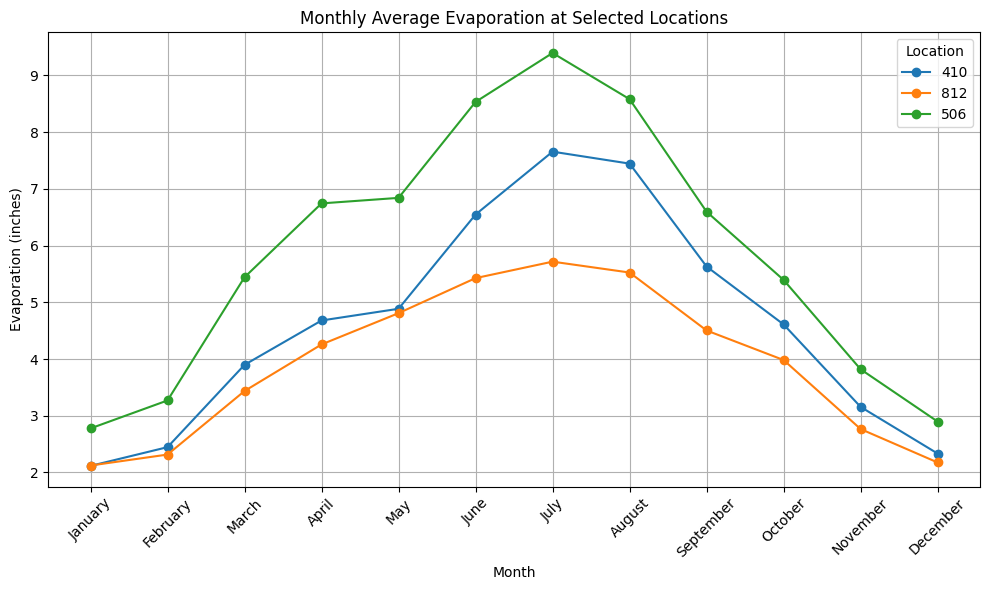

In [32]:
import matplotlib.pyplot as plt
# Define tick labels in correct order
month_names = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
# Select just the desired columns
selected = monthly_avg[["410", "812", "506"]]
# Plot all three on the same figure
selected.plot(kind='line', marker='o', figsize=(10, 6))
# Customize labels and title
plt.title("Monthly Average Evaporation at Selected Locations")
plt.xlabel("Month")
plt.ylabel("Evaporation (inches)")
plt.grid(True)
plt.legend(title="Location")
# Set tick locations and labels
plt.xticks(ticks=range(12), labels=month_names, rotation=45)
# Show the plot
plt.tight_layout()
plt.show()